<a href="https://colab.research.google.com/github/dkaratzas/XNAP2020-21/blob/main/Week%201%20-%20Revision/W01_01_Intro_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is PyTorch?

<a href="https://pytorch.org/">Pytorch</a> is a Python based scientific computing package targeted at two types of audience:

-  At the low level, it is a tensor library capable to exploit the computational power of GPUs
-  At the high level, it is a deep learning research platform that provides maximum flexibility and speed

## Import the library

In [1]:
import torch
import numpy
import time

## Getting help in Jupyter

The fastest way to get some quick help on something using Jupyter is to just ask! Type any Python object name you want followed by a question mark `?` and the code documentation will be loaded in your notebook. Try it with `torch`

In [2]:
torch.__version__

'2.4.1+cpu'

The following command will list all objects of torch that with a name that finishes with "Tensor"

In [3]:
# In Colab, you can press <esc> to get out of help
torch.*Tensor?

torch.BFloat16Tensor
torch.BoolTensor
torch.ByteTensor
torch.CharTensor
torch.DoubleTensor
torch.FloatTensor
torch.HalfTensor
torch.IntTensor
torch.LongTensor
torch.ShortTensor
torch.Tensor

If you use Colab, you also have a handy autocomplete feature at hand. For example, start writing a function name, like `torch.sqrt` if you pause after the first few characters a context menu with possible options will appear. Select the term you meant and press Tab or Enter to autocomplete. Note, this will not work in Jupyter Lab / Notebook out of the box, you would need to install an extension to enable this functionality.

In [4]:
torch.ShortTensor  # complete by typing a little bit more, wait and then use <Tab> or <Enter> to autocomplete

torch.ShortTensor

In Jupyter Lab (but not in CoLab) you can access the same documentation by clicking on the Python object and pressing `<Shift>` + `<Tab>`. Try it in the line below

In [5]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

You should see the same result as with the line below

In [6]:
# Annotate your functions / classes!
torch.nn.Module?

Init signature: torch.nn.Module(*args, **kwargs) -> None
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
            

Where does this documentation come from? Part of it comes from the code itself, and part of it from the annotations (special comments) that are introduced in the function / class definitions. To have a look at the actual code of a function, just use a double `??`. See for example below, and get used to annotate your functions / classes as well!

In [7]:
torch.nn.Module??

Init signature: torch.nn.Module(*args, **kwargs) -> None
Source:        
class Module:
    r"""Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    .. note::
        As per the example above, an ``__init__()`` call to the parent class
        must be made before assignment on the

## Before Torch, Lets do some Exercices

In [2]:
import numpy as np

* Given a A-Matrix (8, 100) and a B-matrix (5, 100) compute the Euclidean Distance from all the points in A to B? 
* Considering a (w,h,3) image of (dtype=ubyte), compute the number of unique colors
* Consider an array of dimension (5,5,3), how to mulitply it by an array with dimensions (5,5)?
* How to swap two rows of an array?
* Consider two arrays A and B of shape (8,3) and (2,2). How to find rows of A that contain elements of each row of B regardless of the order of the elements in B?


## Torch!

At the core of PyTorch there is the `Tensor` class. It is very much like numpy's arrays, but supports autograd.

In [3]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [4]:
# Get the size of the tensor
t.size()

torch.Size([2, 3, 4])

In [5]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [6]:
t

tensor([[[1.7609e+19, 1.9284e+31, 1.6530e+19, 1.3556e-19],
         [4.2903e+24, 3.2181e+21, 1.7036e+19, 4.3988e+21],
         [1.8524e+28, 1.1546e+19, 2.1134e+02, 1.4215e+19]],

        [[1.1431e+27, 1.8987e+28, 7.2251e+28, 1.3556e-19],
         [4.2903e+24, 1.2571e+19, 1.7181e+19, 1.9284e+31],
         [1.9431e-19, 1.6078e+19, 3.2770e+09, 6.9099e+28]]])

In [7]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[7., 5., 0., 9.],
         [8., 2., 0., 9.],
         [5., 6., 5., 3.]],

        [[8., 3., 2., 1.],
         [3., 8., 8., 6.],
         [8., 5., 7., 2.]]])

In [8]:
r = t.view(3, 8)
r

tensor([[7., 5., 0., 9., 8., 2., 0., 9.],
        [5., 6., 5., 3., 8., 3., 2., 1.],
        [3., 8., 8., 6., 8., 5., 7., 2.]])

In [9]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [11]:
# What are strides. And how are they related to shapes?
print(t.stride(), r.stride())
print(t.shape, r.shape)

(12, 4, 1) (8, 1)
torch.Size([2, 3, 4]) torch.Size([3, 8])


In [12]:
# Let's try that again without doing the operations in place
t.random_(10)

tensor([[[5., 7., 1., 5.],
         [2., 7., 5., 6.],
         [3., 4., 5., 4.]],

        [[4., 5., 6., 6.],
         [6., 5., 9., 5.],
         [3., 8., 8., 8.]]])

In [13]:
# Not in place
r = t.view(3, 8)
r = torch.zeros_like(r)
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
t

tensor([[[5., 7., 1., 5.],
         [2., 7., 5., 6.],
         [3., 4., 5., 4.]],

        [[4., 5., 6., 6.],
         [6., 5., 9., 5.],
         [3., 8., 8., 8.]]])

In [15]:
# What are strides?
print(t.stride(), r.stride())

(12, 4, 1) (8, 1)


In [16]:
# This *is* important
s = r.clone()

In [17]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [18]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

## Vectors (1D Tensors)

In [19]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [20]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [21]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [22]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [23]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [24]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([7., 8., 1., 2., 0.])

In [25]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 7.0, last: 0.0


In [26]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([8., 1.])

In [27]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [28]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


## Matrices (2D Tensors)

In [29]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [30]:
m.dim()

2

In [31]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [32]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [33]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [34]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [35]:
# Indexing column 1, all rows (returns size 2x2)
m[:, [1]]

tensor([[5.],
        [2.]])

In [36]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [37]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [38]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [39]:
# Scalar product
m @ v

tensor([49., 47.])

In [40]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[0, :] @ v

tensor(49.)

In [41]:
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [42]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.1566, 5.3350, 3.7109, 7.1737],
        [4.8223, 2.2566, 1.4054, 9.4768]])

In [43]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.7137, 4.1048, 2.1902, 6.5714],
        [3.5903, 1.2725, 0.9843, 8.1136]])

In [44]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[1.2611, 3.4945, 2.8923, 0.1120],
        [2.6081, 1.5211, 0.4197, 4.4169]])

In [45]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 3.0631, 30.0651, 17.1686, 22.9224],
        [ 4.2572, 37.9802,  1.0732, 45.4766]])

In [46]:
m.size()

torch.Size([2, 4])

In [47]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [48]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Broadcasting

Two tensors are “broadcastable” if the following rules hold:

*   Each tensor has at least one dimension.
*   When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.


In [49]:
x=torch.empty(5,7,3)
y=torch.empty(5,7,3)
# x and y are broadcastable since all dimensions are equal

x=torch.empty((0,))
y=torch.empty(2,2)
# x and y are not broadcastable, because x does not have at least 1 dimension

x=torch.empty(5,3,4,1)
y=torch.empty(  3,1,1)
# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist

# but:
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)
# x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3

In [50]:
# How is the output dimension calculated?
x=torch.empty(5,1,4,1)
y=torch.empty(3,1,1)
print((x+y).size())

x=torch.empty(1)
y=torch.empty(3,1,7)
print((x+y).size())

torch.Size([5, 3, 4, 1])
torch.Size([3, 1, 7])


## Constructors

In [51]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [52]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [53]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [54]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [55]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [56]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [58]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

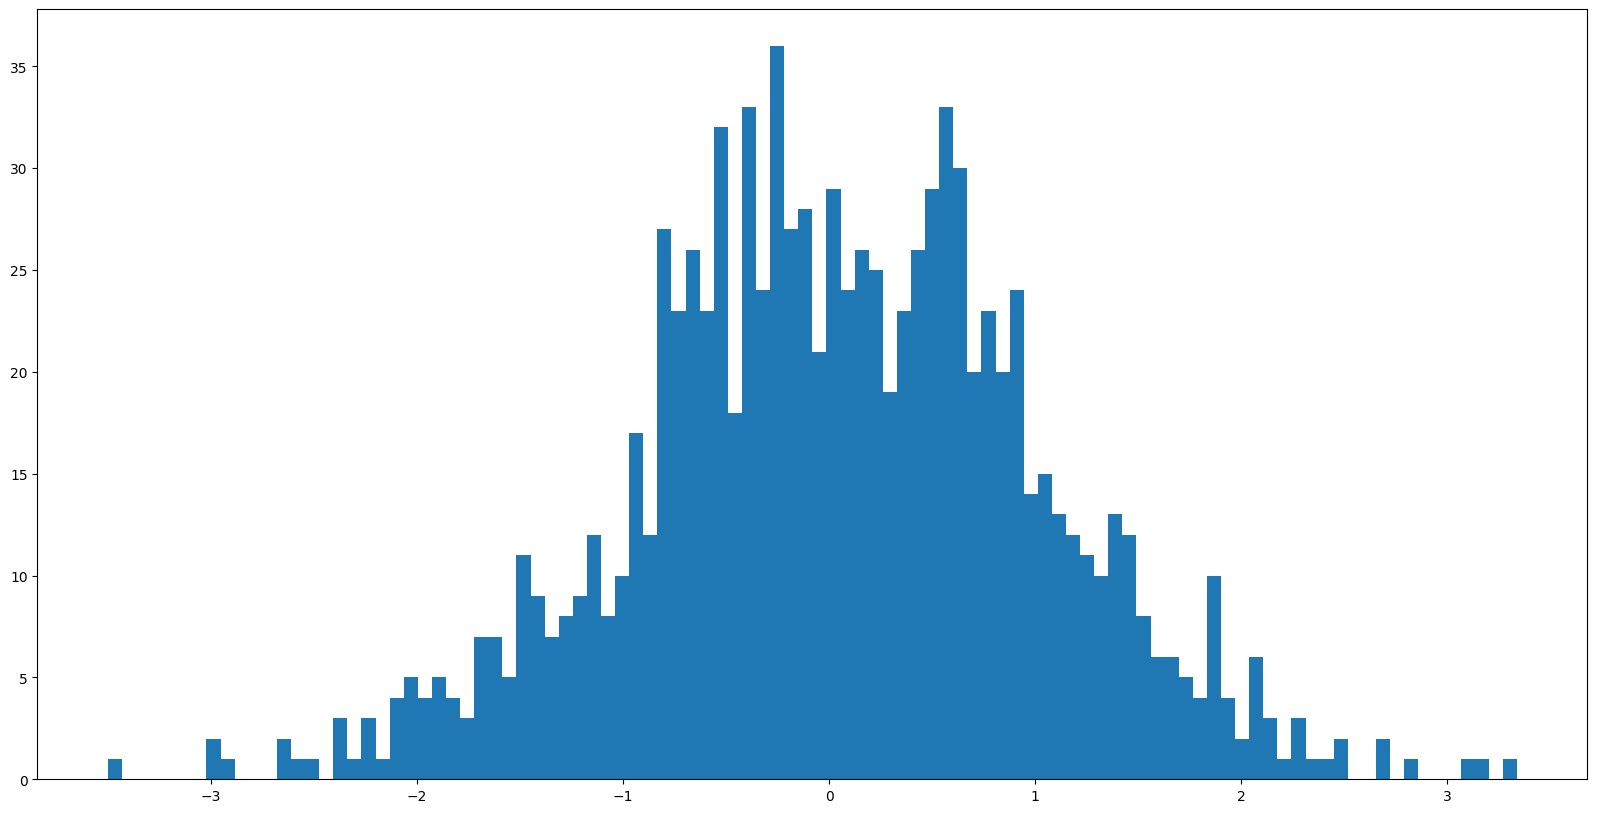

In [59]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

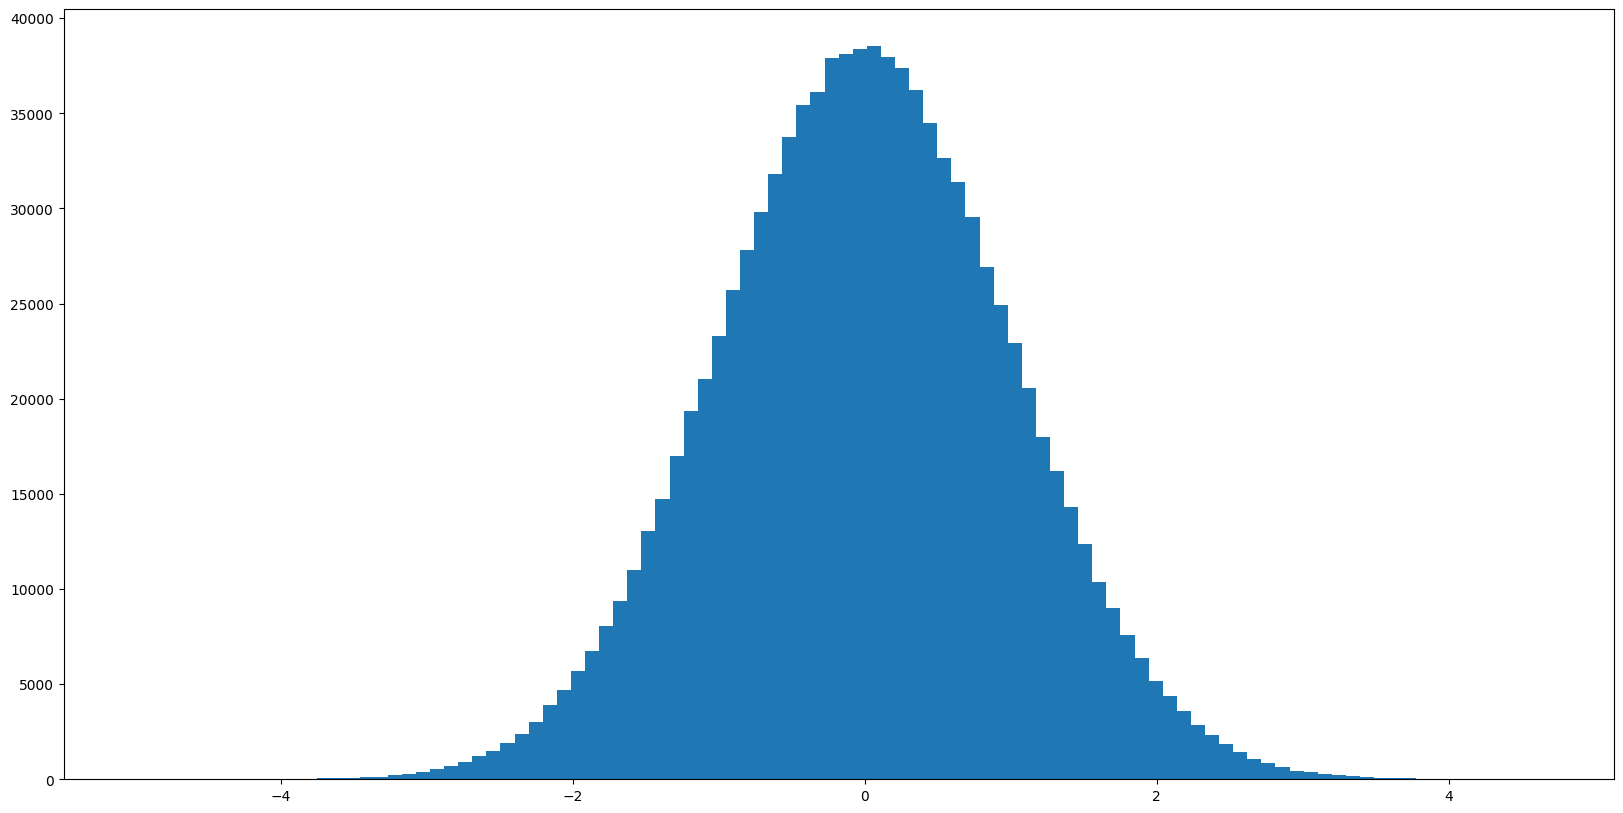

In [60]:
plt.hist(torch.randn(10**6).numpy(), 100);

## Casting

In [61]:
# Helper to get what kind of tensor types
torch.*Tensor?

torch.BFloat16Tensor
torch.BoolTensor
torch.ByteTensor
torch.CharTensor
torch.DoubleTensor
torch.FloatTensor
torch.HalfTensor
torch.IntTensor
torch.LongTensor
torch.ShortTensor
torch.Tensor

In [62]:
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [63]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [64]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [65]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [66]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [67]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [68]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [69]:
# In-place multiplication of all elements by 2 for tensor n
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## Using the GPU

In [70]:
# If this cell fails you need to change the runtime of your colab notebook to GPU
# Go to Runtime -> Change Runtime Type and select GPU
assert torch.cuda.is_available(), "GPU is not enabled"

# use the first gpu available if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

AssertionError: GPU is not enabled

In [ ]:
# Tensors can be moved between gpu and cpu memory

tensor = torch.randn(5, 5) # create a 5x5 matrix filled with random numbers
print(f"tensor's device: {tensor.device}") # by default tensors are stored in cpu memory (RAM)

# Move your tensor to GPU device 0 if there is one (first GPU in the system)
if torch.cuda.is_available():
    tensor = tensor.to(device) # tensor.cuda() is an alternative although not recommended
print(f"tensor's device: {tensor.device}")

In [34]:
# A common mistake 
a = torch.randn(5, 2)
b = torch.randn(1, 2)

# This throws an exception, since you can't operate on tensors stored in
# different devices, and the error message is pretty clear about that
c = a * b

In [ ]:
start = time.time()
c = a * b
end = time.time()
print(f" time: {end - start:.4f} sec")

In [ ]:
# A common mistake 
a = torch.randn(5, 2, device=device)
b = torch.randn(1, 2, device=device)

# This throws an exception, since you can't operate on tensors stored in
# different devices, and the error message is pretty clear about that
start = time.time()
c = a * b
end = time.time()
print(f" time: {end - start:.4f} sec")

## Management of GPU


In [ ]:
import time

# Large tensor
size = (10000, 10000)
cpu_tensor = torch.randn(size)

start = time.time()
for _ in range(10):
    gpu_tensor = cpu_tensor.to("cuda") 
    _ = gpu_tensor.mean()
end = time.time()
print(f"Time: {end - start:.4f} sec")

In [ ]:
start = time.time()
gpu_tensor = cpu_tensor.to("cuda")  # Move once
for _ in range(10):
    _ = gpu_tensor.mean()  # Only compute on GPU
end = time.time()
print(f"Time: {end - start:.4f} sec")

# Gradient Computation



In [ ]:
# Tensors also track the operations applied on them in order to differentiate them

# setting requires_grad to true tells the autograd engine that we want to compute
# gradients for this tensor
a = torch.tensor([2., 3.], requires_grad=True)

L = 3*a**3
L.sum().backward()
print(f"Gradient of a with respecto to L: {a.grad}")

Lets check if the computed gradients are correct:

\begin{equation}

\frac{\partial{L}}{\partial{a}} = [9 * a_1^2, 9 * a_2^2] \\
\frac{\partial{L}}{\partial{a}} = [9 * 2^2, 9 * 3^2] \\
\frac{\partial{L}}{\partial{a}} = [36, 81]


\end{equation}

As we can see the gradient vector matches the one computed by the autograd engine (no surprise there)

In [ ]:
# Notice that the output tensor of an operation will require gradients even 
# if only a single input tensor has requires_grad=True.

x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does a require gradients? : {a.requires_grad}")
b = x + z
print(f"Does b require gradients?: {b.requires_grad}")

## Much more

There's definitely much more, but this was the basics about `Tensor`s fun.

*Torch* full API should be read at least once.
Hence, go [here](https://pytorch.org/docs/stable/index.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.

# Homework

A) The code below simulates a tiny neural network, however it throws an exception. As you build neural networks in PyTorch you will see this exception **often**. Look at the error message, explain whats happening and make the necessary changes to the code to get an output from this tiny network

B) Once you manage to sucessfully run the code below notice how the shape of the tensors ```fts``` and ```bias``` are drastically different, yet they can be added together. Which internal PyTorch mechanism makes this addition happen?

In [ ]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))
fts = torch.mm(features, weights)
print(fts + bias)
print(fts.shape, bias.shape)

# More Homework

C) Answer the following questions about the cell below

1. Does the value of ```t``` change? Why?
2. Does the shape of ```t``` change? Why?
3. Explain, in your own words. What is the stride of a tensor, why is it convenient to have them?
4.  Pick a mathematical operation like cosine or square root (not those though 🙂). Can you find the correspoding function in the [torch library](https://https://pytorch.org/docs/stable/torch.html#pointwise-ops). 
5. Apply the function element-wise to ```a```. Does it return an error? Why? How can it be fixed?
6. Is there a version of the function that operates in place?
7. Run the same funcion on the GPU. Do you notice any difference in runtime? If not, why do you think that is?

In [ ]:
t = torch.tensor(list(range(9)))

a = t.view(3, 3)
a.mul_(2)